In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\jenan\Downloads\Students_Performance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
#a.To find out how many males and females participated in the test.
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [4]:
#b.To analyse the student's parental level of education
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

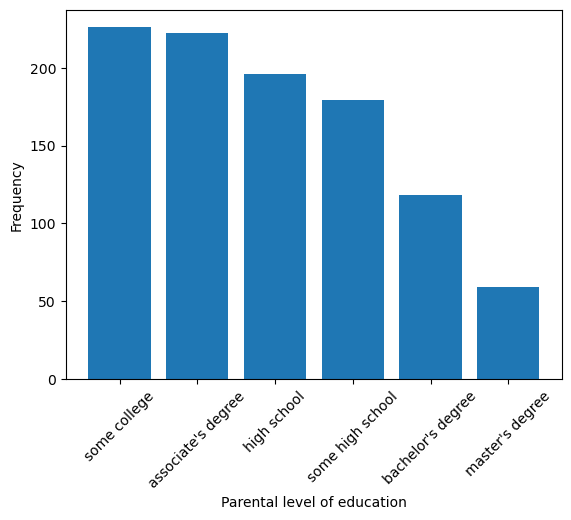

In [5]:
#To analyse the student's parental level of education through visualization
plt.bar(data['parental level of education'].value_counts().index,data['parental level of education'].value_counts().values)
plt.xticks(rotation=45)
plt.xlabel("Parental level of education")
plt.ylabel("Frequency")
plt.show()

A larger number of parents have some college or associate degree and only a small number of parents have master's degree.

In [6]:
#c(i)To find out who scores the most on average for math,reading and writing based on gender.
gender_mean=data.groupby('gender')[['math score','reading score','writing score']].mean()
gender_mean

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


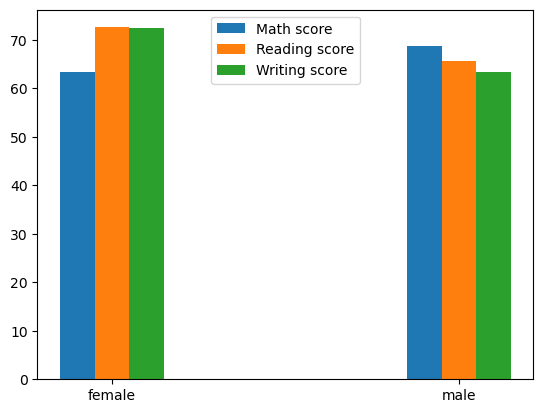

In [7]:
#Visualization
values=np.arange(len(gender_mean.index))
width=0.1
plt.bar(values,gender_mean['math score'],width,label='Math score')
plt.bar(values+width,gender_mean['reading score'],width,label='Reading score')
plt.bar(values+(2*width),gender_mean['writing score'],width,label='Writing score')
plt.xticks(values+width,gender_mean.index)
plt.legend(loc='upper center')
plt.show()

On average,male students score the most in Maths whereas female students score the most in reading and writing.

In [8]:
#c(ii)To find out who scores the most on average for math,reading and writing based on test preparation course.
test_prep=data.groupby('test preparation course')[['math score','reading score','writing score']].mean()
test_prep

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


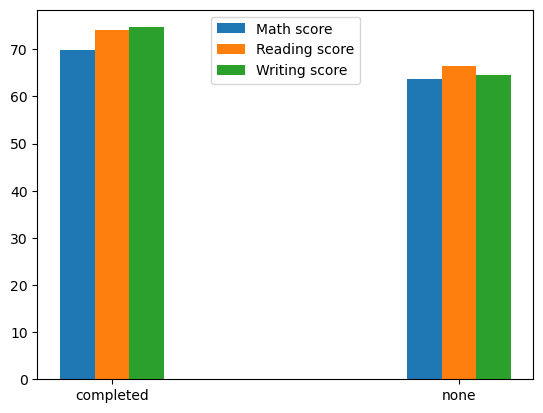

In [9]:
#Visualization
values=np.arange(len(test_prep.index))
width=0.1
plt.bar(values,test_prep['math score'],width,label='Math score')
plt.bar(values+width,test_prep['reading score'],width,label='Reading score')
plt.bar(values+(2*width),test_prep['writing score'],width,label='Writing score')
plt.xticks(values+width,test_prep.index)
plt.legend(loc='upper center')
plt.show()

Students who have completed their test preparation course score the most on average for math,reading and writing.

In [10]:
#d(i)To analyse the scoring variation for math,reading and writing based on gender.
gender_var=data.groupby('gender')[['math score','reading score','writing score']].var()
gender_var

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


The scoring variation for math,reading and writing is more for female students than male students. 

In [11]:
#d(ii)To analyse the scoring variation for math,reading and writing based on test preparation course.
test_prep_var=data.groupby('test preparation course')[['math score','reading score','writing score']].var()
test_prep_var

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


The students who haven't completed the test preparation course have more scoring variation than those who have completed the test preparation course.

In [12]:
#e.To find the top 25% of students based on their math score. 
Bonus=data.sort_values('math score',ascending=False)
Bonus.head(250)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


# Case Study on Testing of Hypothesis

In [13]:
sales_data=pd.read_csv(r"C:\Users\jenan\Downloads\Sales_add.csv")
sales_data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [14]:
sales_data.rename(columns={'Sales_before_digital_add(in $)':'Sales_before_digital_add'},inplace=True)
sales_data.rename(columns={'Sales_After_digital_add(in $)':'Sales_After_digital_add'},inplace=True)

In [15]:
#a.To check whether there is any increase in sales after stepping into digital marketing.

Null hypothesis:There is no increase in sales after stepping into digital marketing.

Alternate hypothesis:There is an increase in sales after stepping into digital marketing.

In [16]:
import scipy.stats as stats
alpha=0.05
t_val,p_val=stats.ttest_rel(sales_data['Sales_before_digital_add'],sales_data['Sales_After_digital_add'])
if p_val<alpha:
    print("Reject null hypothesis,i.e there is an increase in sales after stepping into digital marketing.")
else:
    print("Do not reject null hypothesis,i.e there is no increase in sales after stepping into digital marketing.")


Reject null hypothesis,i.e there is an increase in sales after stepping into digital marketing.


In [17]:
#b.To check whether there is any dependency between the features region and manager.

Null hypothesis:There is no dependency between the features region and manager

Alternate hypothesis:There is dependency between the features region and manager

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
alpha=0.05
model = ols('Sales_After_digital_add ~ C(Region) + C(Manager) +C(Region):C(Manager)',data=sales_data).fit()
anova_table=sm.stats.anova_lm(model,typ = 2)
print(anova_table)

                            sum_sq    df         F    PR(>F)
C(Region)             1.114049e+09   2.0  0.810150  0.466032
C(Manager)            2.568861e+09   2.0  1.868109  0.193579
C(Region):C(Manager)  8.388157e+08   4.0  0.304999  0.869479
Residual              8.938238e+09  13.0       NaN       NaN


Since the p value for interaction between region and manager,0.869479 >alpha, we accept the null hypothesis.i.e there is no dependency between the features region and manager.